In [22]:
import sys
import os
import math
import numpy as np
sys.path.append('.')
import pickle
#import CellModeller
import json
import matplotlib.pyplot as plt
from scipy.signal import correlate, find_peaks

import warnings
warnings.filterwarnings('ignore')

In [2]:
# open already processed pickles stored in JSON file
with open('data_contDeg03.json') as json_file:  
    database = json.load(json_file)

#### Kymo

In [20]:
# get vectors from file
x = [d[0] for d in database]
R = [d[1] for d in database]
G = [d[2] for d in database]
B = [d[3] for d in database]

In [13]:
# construct kymo
kymo = np.zeros([len(database), len(x[-1]), 3])
for i, x_vals in enumerate(x):
    kymo[i, :len(x_vals), 0] = R[i]
    kymo[i, :len(x_vals), 1] = G[i]
    kymo[i, :len(x_vals), 2] = B[i]

In [14]:
# normalization (max - min)
vals = kymo[:,:,0]
kymo[:,:,0] = (vals-vals.min()) / (vals.max()-vals.min())

vals = kymo[:,:,1]
kymo[:,:,1] = (vals-vals.min()) / (vals.max()-vals.min())

vals = kymo[:,:,2]
kymo[:,:,2] = (vals-vals.min()) / (vals.max()-vals.min())

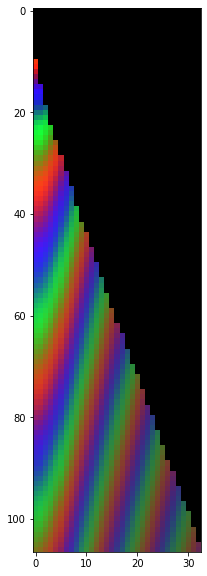

In [15]:
# plot
plt.figure(figsize=(10, 10))
plt.imshow(kymo);

Channel  0


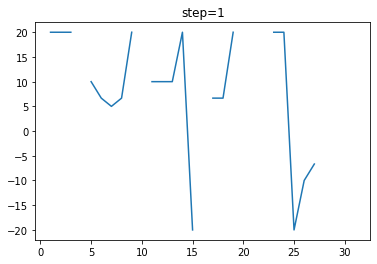

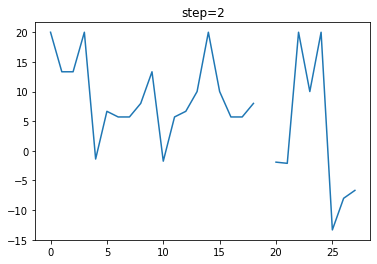

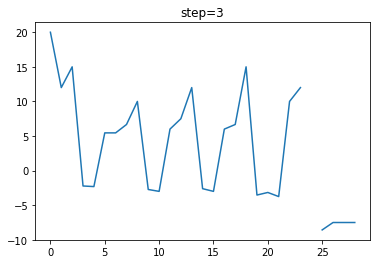

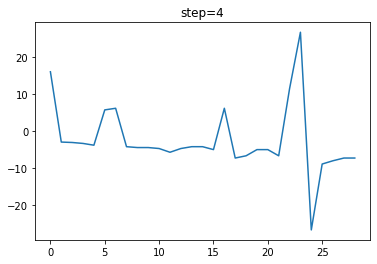

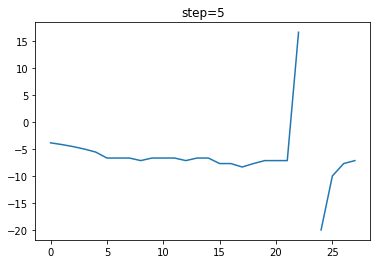

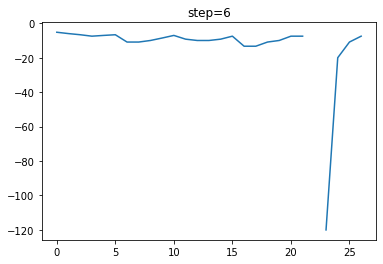

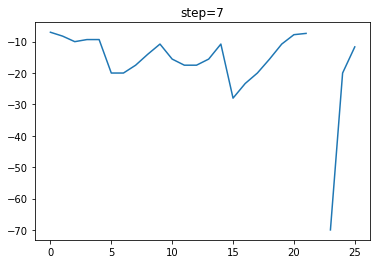

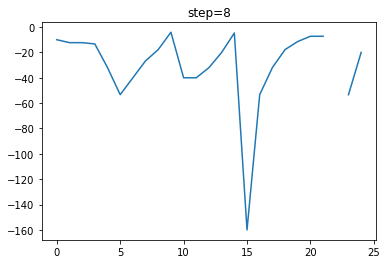

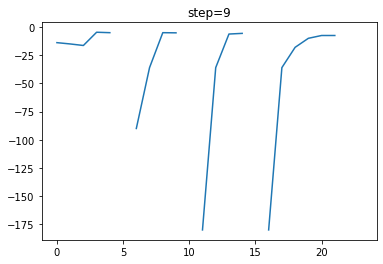

Channel  1


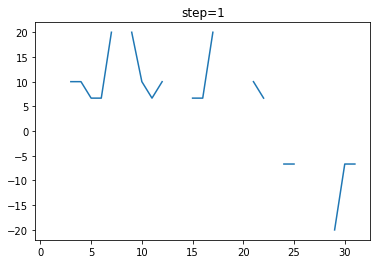

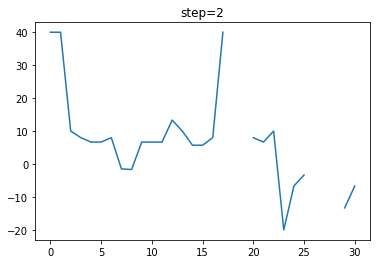

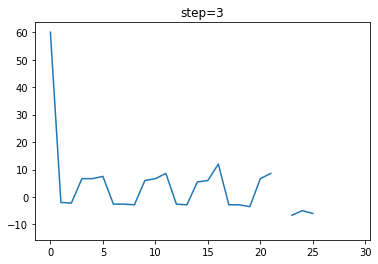

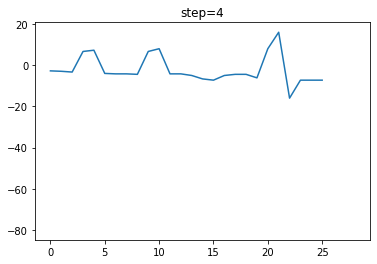

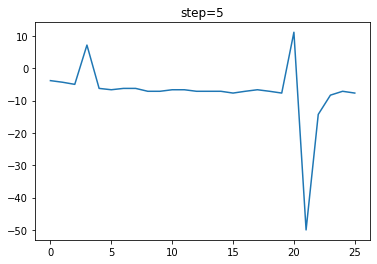

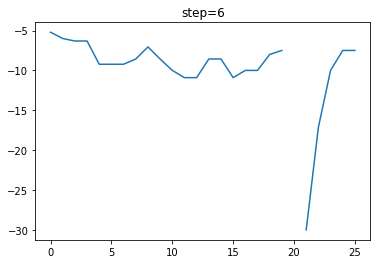

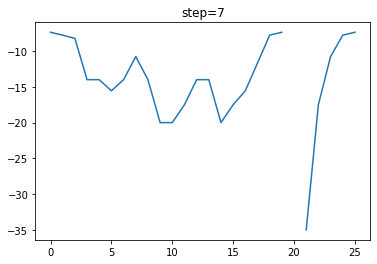

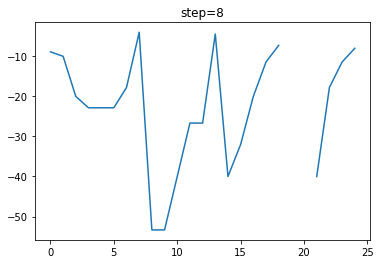

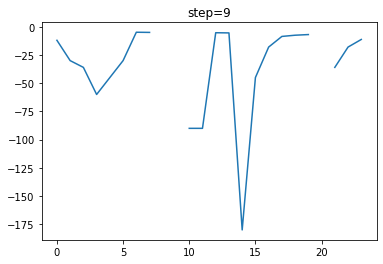

Channel  2


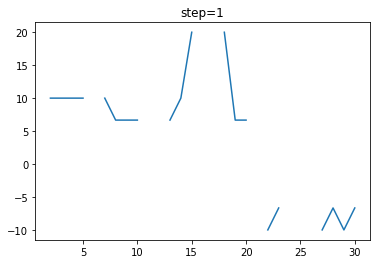

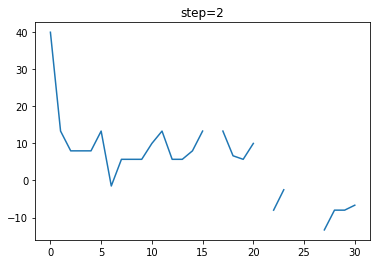

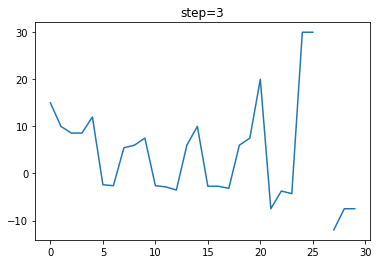

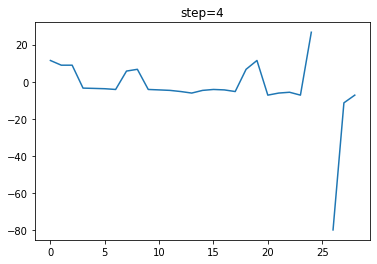

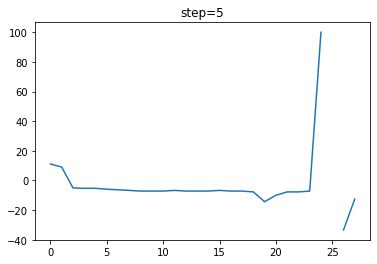

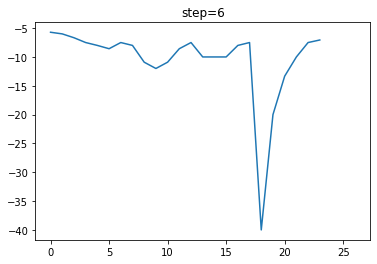

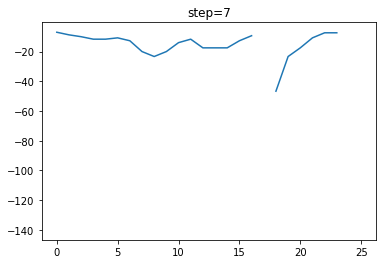

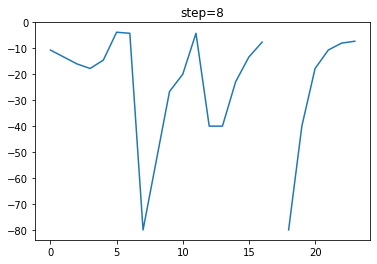

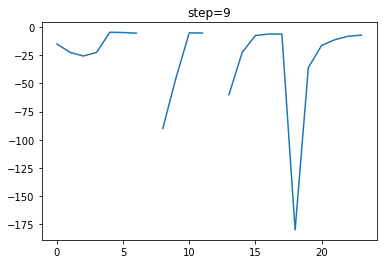

In [23]:
steps = [1, 2, 3, 4, 5, 6, 7, 8, 9]
chnls = [0, 1, 2]
vels_arr_c = []
for chnl in chnls:
    print("Channel ", chnl)
    vels_arr = []
    for step in steps:
        vels = []
        for col in range(kymo.shape[1]-step):
            c = correlate(kymo[:,col,chnl]-np.mean(kymo[:,col,chnl]), kymo[:,col,chnl]-np.mean(kymo[:,col,chnl]), mode='same')
            cc = correlate(kymo[:,col,chnl]-np.mean(kymo[:,col,chnl]), kymo[:,col+step,chnl]-np.mean(kymo[:,col+step,chnl]), mode='same')

            pks_c, _ = find_peaks(c)
            pks_cc, _ = find_peaks(cc)

            max_c = np.where(c[pks_c]==np.max(c[pks_c]))
            idx_max_c = max_c[0][0]
            t_c = pks_c[idx_max_c]

            max_cc = np.where(cc[pks_cc]==np.max(cc[pks_cc]))
            idx_max_cc = max_cc[0][0]
            t_cc = pks_cc[idx_max_cc]

            vel = (step)*5/((t_cc-t_c)*0.025*10)
            vels.append(vel)

        plt.plot(vels)
        vels_arr.append(vels)
        plt.title(f"step={step}")
        plt.show()
    vels_arr_c.append(vels_arr)

In [24]:
## Observed in plots, the more stable plots:
# chnl 0
# step 5, 6
# chnl 1
# step 5
# chnl 2
# step 5

#### R

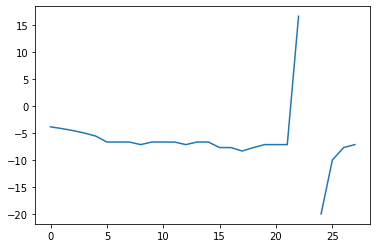

In [26]:
plt.plot(vels_arr_c[0][4]);

In [28]:
np.mean(vels_arr_c[0][4][:20])

-6.46429958929959

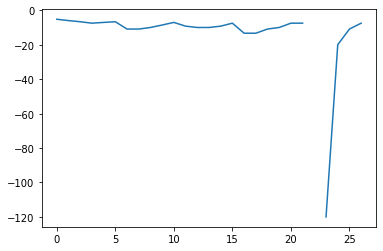

In [30]:
plt.plot(vels_arr_c[0][5]);

In [32]:
np.mean(vels_arr_c[0][5][:20])

-9.004763906170556

#### G

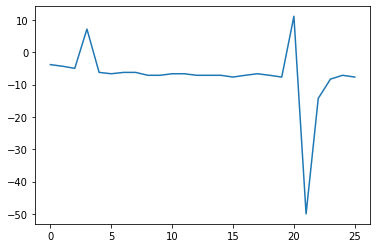

In [33]:
plt.plot(vels_arr_c[1][4]);

In [34]:
np.mean(vels_arr_c[1][4][5:17])

-6.920787545787545

#### B

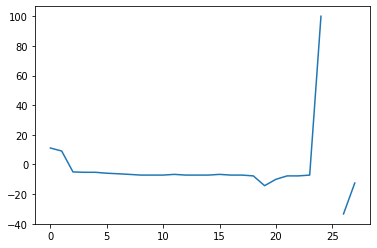

In [35]:
plt.plot(vels_arr_c[2][4]);

In [36]:
np.mean(vels_arr_c[2][4][3:17])

-6.618476337903582